
# ETF stocks clustering

For this project we will attempt to use KMeans Clustering to cluster ETF into 3 clusters in order to recommend a diversified portfolio to new users.

___
## Business Understanding

Starting investing can be intimating.

In this project, We purpose a machine learning model to determine the cluster of stocks which an investor is interested in. This will help investor to diversify his portfolio.

___

## The Data

We will use a data frame with 87 observations on the following 30 variables. Tickers are from bitpanda.com, financial data from justetf.com, on 29th january.
* Fund Currency
* Fund size
* TER (Total expense ratio)
* Growth per periods (1 week, 1/3/6 month, 1/3/5 year, year to date)
* Growth per year (2021, 2020, 2019, 2018)
* Volability (1/3/5 years)
* Return/risk (1/3/5 years)
* Inception date
* Distribution policy
* Fund domicile
* Replication method
* Securities lending
* ISIN
* Ticker
* WKN
* Valor number

### Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style="white", palette=None)

### Get the Data

** Read in the df file using read_csv. Figure out how to set the first column as the index.**

In [2]:
df = pd.read_csv('../input/df-etf/df.csv', index_col=0)

**Check the head of the data**

In [3]:
df.head()

,Fund CCY,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,...,Return/Risk 5Y,Inception date,Distribution policy,Fund domicile,Replication method,Securities lending,ISIN,Ticker,WKN,Valor number
Amundi CAC 40 UCITS ETF DR EUR (C),EUR,1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.86,67.18,...,0.59,14.02.18,Accumulating,Luxembourg,Full replication,Yes,LU1681046931,C40,A2H59J,38785053
Amundi MSCI Nordic UCITS ETF EUR (C),EUR,289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.45,72.22,...,0.70,22.03.18,Accumulating,Luxembourg,Swap based\nUnfunded,No,LU1681044647,CN1,A2H569,38784749
Amundi MSCI Switzerland UCITS ETF EUR (C),EUR,243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.58,70.91,...,0.82,22.03.18,Accumulating,Luxembourg,Swap based\nUnfunded,No,LU1681044720,CSW,A2H57A,38784766
Amundi Prime Euro Corporates UCITS ETF DR (C),EUR,37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,-,-,...,-,21.01.20,Accumulating,Luxembourg,Sampling,Yes,LU2089238625,PRAC,A2PWMN,51515472
Amundi Prime Euro Govies UCITS ETF DR (C),EUR,271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,-,-,...,-,21.01.20,Accumulating,Luxembourg,Sampling,Yes,LU2089238898,PRAR,A2PWMP,51515476


** Check the info() and describe() methods on the data.**

In [4]:
#df.info()

In [5]:
#df.describe()

Observations :

TBD



### Data Cleaning

In [6]:
#df.columns

Fund CCY                0
Fund Size in m          0
TER in p                0
1W in p                 0
1M in p                 0
3M in p                 0
6M in p                 1
1Y in p                 5
3Y in p                28
5Y in p                41
YTD in p                0
2021 in p               5
2020 in p              21
2019 in p              29
2018 in p              37
Vola 1Y                 5
Vola 3Y                28
Vola 5Y                41
Return/Risk 1Y          5
Return/Risk 3Y         28
Return/Risk 5Y         41
Inception date          0
Distribution policy     0
Fund domicile           0
Replication method      0
Securities lending      0
ISIN                    0
Ticker                  0
WKN                     0
Valor number            0
dtype: int64


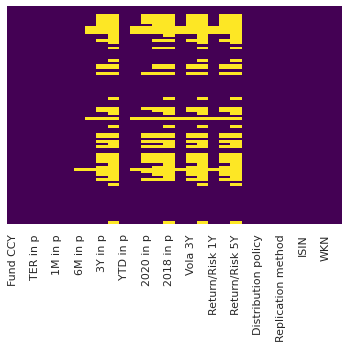

In [7]:
#Find missing values
df = df.replace({'-': np.nan})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(df.isnull().sum())

<AxesSubplot:>

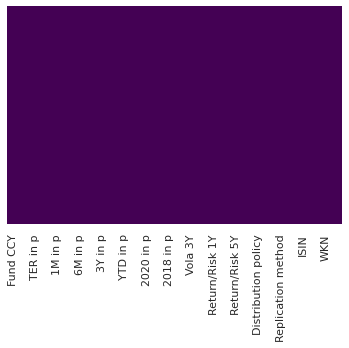

In [8]:
# As Float
df[['TER in p', '1W in p', '1M in p','3M in p', '6M in p', '1Y in p', '3Y in p', '5Y in p', 'YTD in p','2021 in p', '2020 in p', '2019 in p', '2018 in p', 'Vola 1Y','Vola 3Y', 'Vola 5Y', 'Return/Risk 1Y', 'Return/Risk 3Y','Return/Risk 5Y']] = df[['TER in p', '1W in p', '1M in p','3M in p', '6M in p', '1Y in p', '3Y in p', '5Y in p', 'YTD in p','2021 in p', '2020 in p', '2019 in p', '2018 in p', 'Vola 1Y','Vola 3Y', 'Vola 5Y', 'Return/Risk 1Y', 'Return/Risk 3Y','Return/Risk 5Y']].astype('float')


# Impute missing data
df['6M in p'] = df['6M in p'].fillna((df['6M in p'].mean()))
df['1Y in p'] = df['1Y in p'].fillna((df['1Y in p'].mean()))
df['3Y in p'] = df['3Y in p'].fillna((df['3Y in p'].mean()))
df['5Y in p'] = df['5Y in p'].fillna((df['5Y in p'].mean()))
df['2021 in p'] = df['2021 in p'].fillna((df['2021 in p'].mean()))
df['2020 in p'] = df['2020 in p'].fillna((df['2020 in p'].mean()))
df['2019 in p'] = df['2019 in p'].fillna((df['2019 in p'].mean()))
df['2018 in p'] = df['2018 in p'].fillna((df['2018 in p'].mean()))
df['Vola 1Y'] = df['Vola 1Y'].fillna((df['Vola 1Y'].mean()))
df['Vola 3Y'] = df['Vola 3Y'].fillna((df['Vola 3Y'].mean()))
df['Vola 5Y'] = df['Vola 5Y'].fillna((df['Vola 5Y'].mean()))
df['Return/Risk 1Y'] = df['Return/Risk 1Y'].fillna((df['Return/Risk 1Y'].mean()))
df['Return/Risk 3Y'] = df['Return/Risk 3Y'].fillna((df['Return/Risk 3Y'].mean()))
df['Return/Risk 5Y'] = df['Return/Risk 5Y'].fillna((df['Return/Risk 5Y'].mean()))


sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# deal with datetimes
df['Inception date'] = pd.to_datetime(df['Inception date']).dt.year
df.rename(columns = {'Inception date':'Inception year'}, inplace = True)

### Data exploration


* Is there a link between replication methods and performance?
* Is there a link between fund size and performance?
* Which are the ETF that handled COVID the best?
*   Biggest ETF fund
*   Best performing ETF during and not during COVID
* Find corr

In [10]:
#df.head()
df.columns

Index(['Fund CCY', 'Fund Size in m', 'TER in p', '1W in p', '1M in p',
       '3M in p', '6M in p', '1Y in p', '3Y in p', '5Y in p', 'YTD in p',
       '2021 in p', '2020 in p', '2019 in p', '2018 in p', 'Vola 1Y',
       'Vola 3Y', 'Vola 5Y', 'Return/Risk 1Y', 'Return/Risk 3Y',
       'Return/Risk 5Y', 'Inception year', 'Distribution policy',
       'Fund domicile', 'Replication method', 'Securities lending', 'ISIN',
       'Ticker', 'WKN', 'Valor number'],
      dtype='object')

In [11]:
df.describe()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,2019 in p,2018 in p,Vola 1Y,Vola 3Y,Vola 5Y,Return/Risk 1Y,Return/Risk 3Y,Return/Risk 5Y,Inception year,Valor number
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,732.616279,0.397907,-1.704186,-2.972442,-2.646512,-0.324235,6.985556,35.165862,37.946667,-3.238372,...,21.532105,-7.639184,15.262346,19.825345,19.117333,0.377654,0.351207,0.137778,2014.127907,3.334413e+07
std,1923.506676,0.219068,2.560813,5.420931,6.816572,8.367995,15.828241,29.121888,24.912071,5.028386,...,10.875601,6.634969,8.324687,7.443743,5.418225,1.456381,1.155540,1.043688,5.876767,2.597688e+07
min,3.000000,0.050000,-10.360000,-14.410000,-24.240000,-34.520000,-53.810000,-30.620000,-42.340000,-12.410000,...,-3.940000,-39.900000,0.070000,0.070000,0.070000,-9.960000,-9.740000,-9.200000,2000.000000,1.065278e+06
25%,73.750000,0.250000,-3.367500,-6.855000,-6.117500,-3.335000,-1.670000,20.657500,35.129167,-7.355000,...,14.745000,-8.190000,10.935000,18.402500,18.532500,-0.160000,0.351207,0.137778,2010.000000,1.119202e+07
50%,260.500000,0.400000,-1.775000,-1.995000,-1.035000,-0.342118,4.560000,35.165862,37.946667,-2.400000,...,21.532105,-7.639184,15.262346,19.825345,19.117333,0.377654,0.351207,0.137778,2017.000000,3.616254e+07
75%,530.250000,0.545000,0.000000,-0.137500,1.162500,4.275000,16.590000,43.497500,41.720000,-0.462500,...,25.030000,-7.180000,18.720000,22.952500,19.381833,1.157500,0.632500,0.330000,2019.000000,4.936058e+07
max,12258.000000,0.950000,5.530000,12.800000,13.430000,15.250000,57.250000,156.440000,142.640000,8.740000,...,54.170000,9.580000,50.110000,46.350000,38.140000,2.580000,1.690000,1.060000,2021.000000,1.136905e+08


In [12]:
#Create a column with only means for performance, vola, risk&reward
df['Average perf'] = df[['1Y in p', '3Y in p', '5Y in p']].median(axis=1)
df['Average vola'] = df[['Vola 1Y', 'Vola 3Y', 'Vola 5Y']].median(axis=1)
df['Average risk'] = df[['Return/Risk 1Y', 'Return/Risk 3Y', 'Return/Risk 5Y']].median(axis=1)

df.head()

,Fund CCY,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,...,Fund domicile,Replication method,Securities lending,ISIN,Ticker,WKN,Valor number,Average perf,Average vola,Average risk
Amundi CAC 40 UCITS ETF DR EUR (C),EUR,1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,...,Luxembourg,Full replication,Yes,LU1681046931,C40,A2H59J,38785053,56.860000,18.420000,0.750000
Amundi MSCI Nordic UCITS ETF EUR (C),EUR,289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,...,Luxembourg,Swap based\nUnfunded,No,LU1681044647,CN1,A2H569,38784749,61.450000,16.280000,0.930000
Amundi MSCI Switzerland UCITS ETF EUR (C),EUR,243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,...,Luxembourg,Swap based\nUnfunded,No,LU1681044720,CSW,A2H57A,38784766,58.580000,13.730000,1.090000
Amundi Prime Euro Corporates UCITS ETF DR (C),EUR,37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,...,Luxembourg,Sampling,Yes,LU2089238625,PRAC,A2PWMN,51515472,35.165862,19.117333,0.137778
Amundi Prime Euro Govies UCITS ETF DR (C),EUR,271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,...,Luxembourg,Sampling,Yes,LU2089238898,PRAR,A2PWMP,51515476,35.165862,19.117333,0.137778


In [13]:
#Whats the biggest ETF
df.loc[df['Fund Size in m'].idxmax()]

Fund CCY                               USD
Fund Size in m                       12258
TER in p                              0.07
1W in p                              -4.86
1M in p                              -7.19
3M in p                              -0.56
6M in p                               3.94
1Y in p                              24.07
3Y in p                              74.43
5Y in p                              97.76
YTD in p                             -7.85
2021 in p                            39.06
2020 in p                             8.13
2019 in p                            33.58
2018 in p                             -0.2
Vola 1Y                              14.61
Vola 3Y                              22.67
Vola 5Y                              19.88
Return/Risk 1Y                        1.65
Return/Risk 3Y                         0.9
Return/Risk 5Y                        0.73
Inception year                        2002
Distribution policy           Distributing
Fund domici

In [14]:
# Best performing ETF during COVID
df.loc[df['2020 in p'].idxmax()]

Fund CCY                               USD
Fund Size in m                         720
TER in p                              0.65
1W in p                              -5.56
1M in p                             -12.15
3M in p                             -14.13
6M in p                              -1.34
1Y in p                              13.89
3Y in p                          35.165862
5Y in p                          37.946667
YTD in p                             -9.21
2021 in p                            35.55
2020 in p                            76.28
2019 in p                        21.532105
2018 in p                        -7.639184
Vola 1Y                              31.49
Vola 3Y                          19.825345
Vola 5Y                          19.117333
Return/Risk 1Y                        0.44
Return/Risk 3Y                    0.351207
Return/Risk 5Y                    0.137778
Inception year                        2019
Distribution policy           Accumulating
Fund domici

In [15]:
# Best performing ETF during COVID
df.loc[df['2021 in p'].idxmax()]

Fund CCY                                USD
Fund Size in m                           30
TER in p                               0.25
1W in p                               -1.17
1M in p                                12.8
3M in p                                6.47
6M in p                               15.25
1Y in p                               57.25
3Y in p                               23.18
5Y in p                               -4.83
YTD in p                               8.74
2021 in p                              57.7
2020 in p                            -26.83
2019 in p                              6.62
2018 in p                            -10.85
Vola 1Y                               25.84
Vola 3Y                               46.35
Vola 5Y                               38.14
Return/Risk 1Y                         2.22
Return/Risk 3Y                         0.16
Return/Risk 5Y                        -0.03
Inception year                         2014
Distribution policy            D

In [16]:
df.loc[df['2021 in p'].idxmin()]

Fund CCY                            USD
Fund Size in m                       11
TER in p                           0.45
1W in p                           -1.48
1M in p                            -9.5
3M in p                          -24.24
6M in p                          -28.06
1Y in p                          -53.81
3Y in p                       35.165862
5Y in p                       37.946667
YTD in p                          -8.68
2021 in p                        -46.32
2020 in p                      4.683385
2019 in p                     21.532105
2018 in p                     -7.639184
Vola 1Y                           28.12
Vola 3Y                       19.825345
Vola 5Y                       19.117333
Return/Risk 1Y                    -1.91
Return/Risk 3Y                 0.351207
Return/Risk 5Y                 0.137778
Inception year                     2020
Distribution policy        Accumulating
Fund domicile                   Ireland
Replication method     Full replication


In [17]:
df.loc[df['2020 in p'].idxmin()]

Fund CCY                                USD
Fund Size in m                           30
TER in p                               0.25
1W in p                               -1.17
1M in p                                12.8
3M in p                                6.47
6M in p                               15.25
1Y in p                               57.25
3Y in p                               23.18
5Y in p                               -4.83
YTD in p                               8.74
2021 in p                              57.7
2020 in p                            -26.83
2019 in p                              6.62
2018 in p                            -10.85
Vola 1Y                               25.84
Vola 3Y                               46.35
Vola 5Y                               38.14
Return/Risk 1Y                         2.22
Return/Risk 3Y                         0.16
Return/Risk 5Y                        -0.03
Inception year                         2014
Distribution policy            D

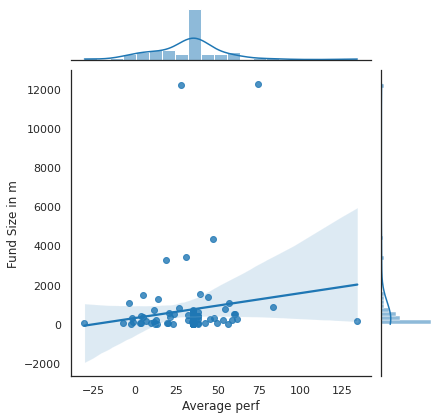

In [18]:
sns.jointplot(x='Average perf',y='Fund Size in m',data=df,kind='reg')

<AxesSubplot:xlabel='Distribution policy', ylabel='count'>

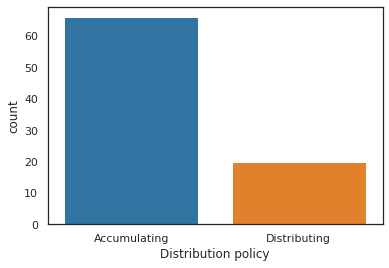

In [19]:
sns.countplot(x='Distribution policy',data=df)

<AxesSubplot:xlabel='Replication method', ylabel='count'>

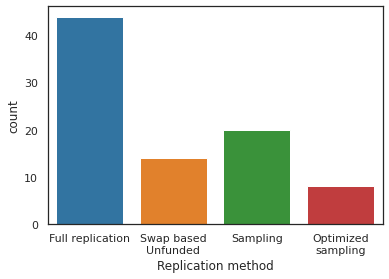

In [20]:
sns.countplot(x='Replication method',data=df)

<AxesSubplot:xlabel='Fund CCY', ylabel='count'>

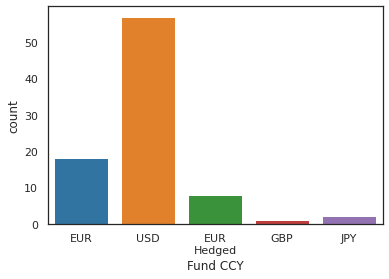

In [21]:
sns.countplot(x='Fund CCY',data=df)

<AxesSubplot:xlabel='Inception year', ylabel='count'>

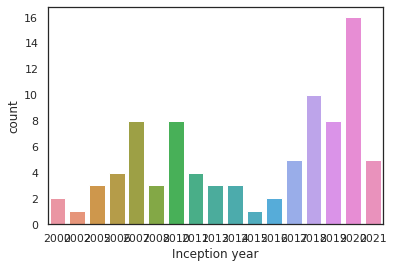

In [22]:
sns.countplot(x='Inception year',data=df)

<AxesSubplot:xlabel='Fund domicile', ylabel='count'>

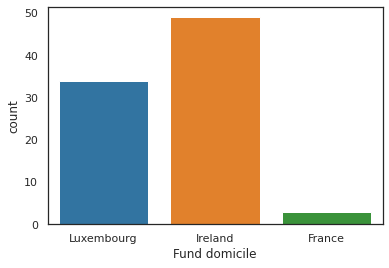

In [23]:
sns.countplot(x='Fund domicile',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Replication method', ylabel='Fund Size in m'>

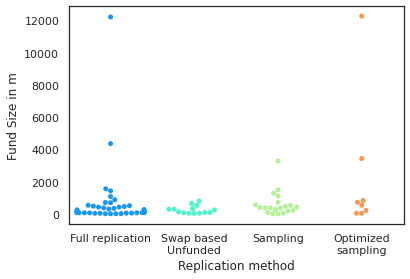

In [24]:
sns.swarmplot(x="Replication method", y="Fund Size in m", data=df,palette='rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fund Size in m'>

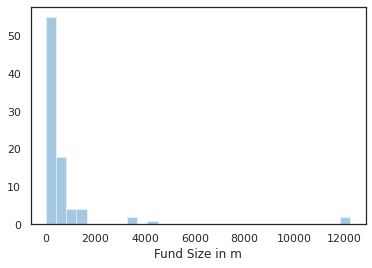

In [25]:
sns.distplot(df['Fund Size in m'],kde=False,bins=30)

### Feature Engineering

* Normaliser et non diviser
* hot encoder sur Replication method, Distribution policy

In [26]:
# Remove categorical feature that we won't need
df = df.drop(['Fund CCY', 'Fund domicile', 'Securities lending', 'ISIN', 'Ticker', 'WKN', 'Valor number'], axis=1)
df.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Vola 5Y,Return/Risk 1Y,Return/Risk 3Y,Return/Risk 5Y,Inception year,Distribution policy,Replication method,Average perf,Average vola,Average risk
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,18.420000,2.08,0.750000,0.590000,2018,Accumulating,Full replication,56.860000,18.420000,0.750000
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,16.280000,0.96,0.930000,0.700000,2018,Accumulating,Swap based\nUnfunded,61.450000,16.280000,0.930000
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,13.730000,1.84,1.090000,0.820000,2018,Accumulating,Swap based\nUnfunded,58.580000,13.730000,1.090000
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,19.117333,-0.88,0.351207,0.137778,2020,Accumulating,Sampling,35.165862,19.117333,0.137778
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,19.117333,-0.86,0.351207,0.137778,2020,Accumulating,Sampling,35.165862,19.117333,0.137778


In [27]:
# One hot encoding for Replication method and distribution policy

#Which methods?
print(df['Replication method'].unique())
print(df['Distribution policy'].unique())

['Full replication' 'Swap based\nUnfunded' 'Sampling'
 'Optimized\nsampling']
['Accumulating' 'Distributing']


In [28]:
dis_policy = pd.get_dummies(df['Distribution policy'],drop_first=True)
dis_policy

,Distributing
Amundi CAC 40 UCITS ETF DR EUR (C),0
Amundi MSCI Nordic UCITS ETF EUR (C),0
Amundi MSCI Switzerland UCITS ETF EUR (C),0
Amundi Prime Euro Corporates UCITS ETF DR (C),0
Amundi Prime Euro Govies UCITS ETF DR (C),0
...,...
Xtrackers Nikkei 225 UCITS ETF 1D,1
Xtrackers Russell 2000 UCITS ETF 1C,0
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,0
Xtrackers Spanish Equity UCITS ETF 1C,0


In [29]:
rep_method = pd.get_dummies(df['Replication method'], prefix='Rep')
rep_method.columns = ['Rep_Full', 'Rep_Opti', 'Rep_Samp', 'Rep_Swap']

rep_method.head()

,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap
Amundi CAC 40 UCITS ETF DR EUR (C),1,0,0,0
Amundi MSCI Nordic UCITS ETF EUR (C),0,0,0,1
Amundi MSCI Switzerland UCITS ETF EUR (C),0,0,0,1
Amundi Prime Euro Corporates UCITS ETF DR (C),0,0,1,0
Amundi Prime Euro Govies UCITS ETF DR (C),0,0,1,0


In [30]:
df.drop(['Replication method','Distribution policy'],axis=1,inplace=True)
df = pd.concat([df,dis_policy,rep_method],axis=1)
with_outliers = df.copy()
df.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Return/Risk 5Y,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,0.590000,2018,56.860000,18.420000,0.750000,0,1,0,0,0
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,0.700000,2018,61.450000,16.280000,0.930000,0,0,0,0,1
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,0.820000,2018,58.580000,13.730000,1.090000,0,0,0,0,1
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,0.137778,2020,35.165862,19.117333,0.137778,0,0,0,1,0
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,0.137778,2020,35.165862,19.117333,0.137778,0,0,0,1,0


### EDA

In [31]:
#sns.pairplot(df)

Check outliers in Fund size

In [32]:
from numpy import percentile

data = df['Fund Size in m']

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=73.750, 75th=530.250, IQR=456.500
Identified outliers: 9
Non-outlier observations: 77


In [33]:
print(outliers)

[4356, 12205, 1492, 12258, 1551, 3429, 3281, 1281, 1424]


In [34]:
df[df['Fund Size in m']>1281].index

Index(['iShares Core EURO STOXX 50 UCITS ETF EUR (Dist)',
       'iShares Core FTSE 100 UCITS ETF (Dist)',
       'iShares Core Global Aggregate Bond UCITS ETF EUR Hedged (Acc)',
       'iShares Core S&P 500 UCITS ETF USD (Dist)',
       'iShares MSCI EM Asia UCITS ETF (Acc)',
       'iShares MSCI EM UCITS ETF (Dist)',
       'iShares USD TIPS UCITS ETF USD (Acc)',
       'Xtrackers Russell 2000 UCITS ETF 1C'],
      dtype='object')

In [35]:
df = df.drop(['iShares Core EURO STOXX 50 UCITS ETF EUR (Dist)', 'iShares Core FTSE 100 UCITS ETF (Dist)',
       'iShares Core Global Aggregate Bond UCITS ETF EUR Hedged (Acc)',
       'iShares Core S&P 500 UCITS ETF USD (Dist)',
       'iShares MSCI EM Asia UCITS ETF (Acc)',
       'iShares MSCI EM UCITS ETF (Dist)',
       'iShares USD TIPS UCITS ETF USD (Acc)',
       'Xtrackers Russell 2000 UCITS ETF 1C'])
df.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Return/Risk 5Y,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,0.590000,2018,56.860000,18.420000,0.750000,0,1,0,0,0
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,0.700000,2018,61.450000,16.280000,0.930000,0,0,0,0,1
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,0.820000,2018,58.580000,13.730000,1.090000,0,0,0,0,1
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,0.137778,2020,35.165862,19.117333,0.137778,0,0,0,1,0
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,0.137778,2020,35.165862,19.117333,0.137778,0,0,0,1,0


### Modeling without ouliers

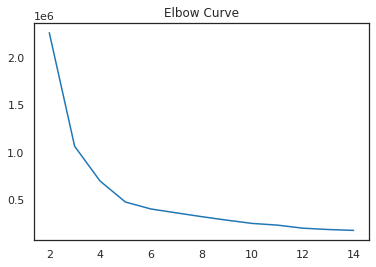

In [36]:
from sklearn.cluster import KMeans
X =  df.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

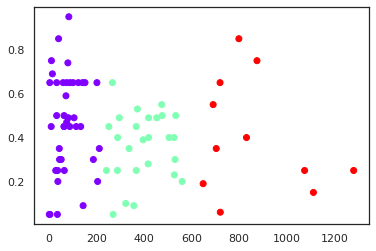

In [37]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [38]:
cluster_labels = pd.DataFrame(kmeans.labels_, index = df.index, columns=['Cluster'])
cluster_labels

,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),2
Amundi MSCI Nordic UCITS ETF EUR (C),1
Amundi MSCI Switzerland UCITS ETF EUR (C),1
Amundi Prime Euro Corporates UCITS ETF DR (C),0
Amundi Prime Euro Govies UCITS ETF DR (C),1
...,...
Xtrackers MSCI Thailand UCITS ETF 1C,0
Xtrackers Nikkei 225 UCITS ETF 1D,0
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,0
Xtrackers Spanish Equity UCITS ETF 1C,0


In [39]:
df = pd.concat([df, cluster_labels],axis=1)
df.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,2018,56.860000,18.420000,0.750000,0,1,0,0,0,2
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,2018,61.450000,16.280000,0.930000,0,0,0,0,1,1
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,2018,58.580000,13.730000,1.090000,0,0,0,0,1,1
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,0
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,1


### Testing strategies (No outliers)

3 ETF from our clusters VS 3 random ETF

In [40]:
# Pick 3 stocks from each clusters
cluster_1 = df[df['Cluster']==0].sample(n=3, random_state=1)
cluster_2 = df[df['Cluster']==1].sample(n=3, random_state=1)
cluster_3 = df[df['Cluster']==2].sample(n=3, random_state=1)

cluster_portfolio = pd.concat([cluster_1, cluster_2, cluster_3])

cluster_portfolio.describe()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,379.444444,0.333333,-1.510000,-3.872222,-2.513333,1.602222,6.206667,21.782605,25.194815,-3.547778,...,2015.666667,21.481494,13.993038,-0.806511,0.222222,0.111111,0.222222,0.333333,0.333333,1.000000
std,317.290920,0.285963,2.864105,5.784503,6.604139,6.018616,7.134592,14.813916,17.627768,5.128952,...,5.147815,15.001541,7.386445,3.351440,0.440959,0.333333,0.440959,0.500000,0.500000,0.866025
min,6.000000,0.050000,-5.710000,-12.150000,-14.130000,-5.340000,-4.330000,-1.980000,-2.980000,-10.480000,...,2007.000000,-1.980000,0.070000,-9.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.090000,-3.730000,-7.210000,-6.770000,-1.340000,1.470000,11.590000,7.320000,-7.130000,...,2013.000000,11.590000,7.690000,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,358.000000,0.350000,-0.020000,-2.530000,-0.180000,0.330000,4.580000,26.530000,37.946667,-2.680000,...,2019.000000,26.530000,18.400000,0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,720.000000,0.450000,0.810000,-0.340000,1.880000,3.620000,12.020000,35.165862,37.946667,-0.150000,...,2019.000000,35.165862,19.117333,0.351207,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,831.000000,0.850000,1.300000,6.060000,5.060000,13.170000,17.430000,35.165862,37.946667,5.500000,...,2020.000000,35.165862,19.825345,0.480000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [41]:
# Pick 9 stocks randomly

rand_portfolio = df.sample(n=9, random_state=1)

rand_portfolio.describe()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.000000
mean,271.000000,0.407778,-1.541111,-3.678889,-3.908889,1.965556,8.514444,24.087510,37.216667,-4.215556,...,2015.888889,24.999732,16.754446,0.345196,0.222222,0.666667,0.0,0.333333,0.0,0.444444
std,182.536983,0.143333,2.397756,4.974803,8.193149,5.786688,11.233930,19.747306,11.202905,4.890422,...,4.539946,15.780178,6.898665,0.247202,0.440959,0.500000,0.0,0.500000,0.0,0.527046
min,65.000000,0.200000,-5.710000,-10.520000,-21.340000,-5.290000,-3.430000,-11.010000,10.020000,-12.160000,...,2010.000000,3.220000,6.700000,0.100000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,116.000000,0.350000,-3.250000,-7.210000,-6.630000,-3.390000,0.420000,12.620000,37.946667,-7.130000,...,2010.000000,12.620000,9.490000,0.137778,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,206.000000,0.450000,-1.270000,-1.640000,0.380000,0.140000,3.220000,31.680000,37.946667,-1.720000,...,2018.000000,31.680000,19.117333,0.300000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,368.000000,0.470000,0.400000,0.490000,0.980000,8.130000,16.470000,35.165862,37.946667,-0.140000,...,2020.000000,35.165862,19.690000,0.600000,0.000000,1.000000,0.0,1.000000,0.0,1.000000
max,561.000000,0.650000,1.220000,1.990000,2.290000,9.550000,31.130000,53.980000,49.290000,0.320000,...,2020.000000,47.960000,28.250000,0.700000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [42]:
print('With clustering. You could gain in 2021', cluster_portfolio['2021 in p'].mean(),'%')
print('With random picking. You could gain in 2021', rand_portfolio['2021 in p'].mean(),'%')

print('With clustering. You could gain in 2018, before covid', cluster_portfolio['2020 in p'].mean(),'%')
print('With random picking. You could gain in 2018, before covid', rand_portfolio['2020 in p'].mean(),'%')

print('With clustering. You could gain 5 Y', cluster_portfolio['5Y in p'].mean(),'%')
print('With random picking. You could gain 5Y', rand_portfolio['5Y in p'].mean(),'%')

With clustering. You could gain in 2021 15.030000000000001 %
With random picking. You could gain in 2021 19.55333333333333 %
With clustering. You could gain in 2018, before covid 11.369641025641025 %
With random picking. You could gain in 2018, before covid -4.359982905982907 %
With clustering. You could gain 5 Y 25.194814814814812 %
With random picking. You could gain 5Y 37.21666666666666 %


In [43]:
print('With clustering. Return/risk in 2021', cluster_portfolio['Return/Risk 1Y'].mean())
print('With random picking. Return/risk in 2021', rand_portfolio['Return/Risk 1Y'].mean())

print('With clustering. Return/risk 5Y', cluster_portfolio['Return/Risk 5Y'].mean())
print('With random picking. Return/risk 5Y', rand_portfolio['Return/Risk 5Y'].mean())

With clustering. Return/risk in 2021 -0.5844444444444445
With random picking. Return/risk in 2021 0.7066666666666666
With clustering. Return/risk 5Y -0.8923456790123456
With random picking. Return/risk 5Y 0.18185185185185188


In [44]:
print('With clustering. Volatibility in 2021', cluster_portfolio['Vola 1Y'].mean(),'%')
print('With random picking. Volatibility in 2021', rand_portfolio['Vola 1Y'].mean(),'%')

print('With clustering. Volatibility 5 years', cluster_portfolio['Vola 5Y'].mean(),'%')
print('With random picking. Volatibility 5 years', rand_portfolio['Vola 5Y'].mean(),'%')

With clustering. Volatibility in 2021 12.782222222222224 %
With random picking. Volatibility in 2021 14.009999999999998 %
With clustering. Volatibility 5 years 15.232962962962963 %
With random picking. Volatibility 5 years 20.23488888888889 %


### Modeling with outliers

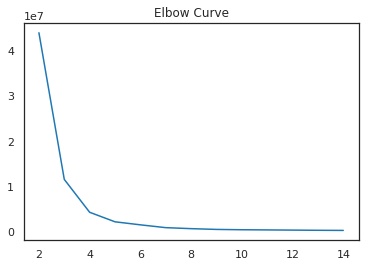

In [45]:
from sklearn.cluster import KMeans
X =  with_outliers.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

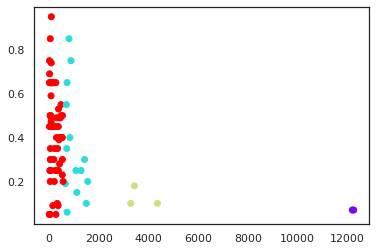

In [46]:
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [47]:
cluster_labels = pd.DataFrame(kmeans.labels_, index = with_outliers.index, columns=['Cluster'])
cluster_labels

,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),1
Amundi MSCI Nordic UCITS ETF EUR (C),3
Amundi MSCI Switzerland UCITS ETF EUR (C),3
Amundi Prime Euro Corporates UCITS ETF DR (C),3
Amundi Prime Euro Govies UCITS ETF DR (C),3
...,...
Xtrackers Nikkei 225 UCITS ETF 1D,3
Xtrackers Russell 2000 UCITS ETF 1C,1
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,3
Xtrackers Spanish Equity UCITS ETF 1C,3


In [48]:
df_outliers = pd.concat([with_outliers, cluster_labels],axis=1)
df_outliers.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,2018,56.860000,18.420000,0.750000,0,1,0,0,0,1
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,2018,61.450000,16.280000,0.930000,0,0,0,0,1,3
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,2018,58.580000,13.730000,1.090000,0,0,0,0,1,3
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,3
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,3


### Modeling with MinMax scaling

In [49]:
df

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),1075,0.25,-1.18,-0.57,5.03,7.85,29.64,56.860000,67.180000,-1.21,...,2018,56.860000,18.420000,0.750000,0,1,0,0,0,2
Amundi MSCI Nordic UCITS ETF EUR (C),289,0.25,-2.46,-6.10,-6.68,-3.06,14.68,61.450000,72.220000,-7.43,...,2018,61.450000,16.280000,0.930000,0,0,0,0,1,1
Amundi MSCI Switzerland UCITS ETF EUR (C),243,0.25,-0.59,-3.51,4.65,5.51,20.03,58.580000,70.910000,-4.62,...,2018,58.580000,13.730000,1.090000,0,0,0,0,1,1
Amundi Prime Euro Corporates UCITS ETF DR (C),37,0.05,0.15,-0.69,-0.50,-1.96,-1.67,35.165862,37.946667,-0.45,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,0
Amundi Prime Euro Govies UCITS ETF DR (C),271,0.05,0.05,-0.99,-0.59,-2.58,-3.19,35.165862,37.946667,-0.50,...,2020,35.165862,19.117333,0.137778,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xtrackers MSCI Thailand UCITS ETF 1C,65,0.50,0.93,1.99,2.29,9.55,3.22,-11.010000,10.020000,0.15,...,2010,3.220000,19.470000,0.100000,0,1,0,0,0,0
Xtrackers Nikkei 225 UCITS ETF 1D,145,0.09,-1.07,-3.85,-1.59,1.65,-4.54,35.590000,48.870000,-3.56,...,2013,35.590000,16.790000,0.490000,1,1,0,0,0,0
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,85,0.95,-5.78,-6.15,-7.38,1.14,10.51,20.050000,24.040000,-7.80,...,2008,20.050000,17.610000,0.310000,0,0,0,0,1,0
Xtrackers Spanish Equity UCITS ETF 1C,46,0.30,-1.71,2.07,-1.02,0.79,12.92,7.360000,14.790000,0.25,...,2011,12.920000,19.850000,0.140000,0,1,0,0,0,0


In [50]:
#Scaling data using MinMax

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
 
scaler = MinMaxScaler()
 
df_minmax_scaled = scaler.fit_transform(df)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, index = df.index, columns=df.columns)

df_minmax_scaled

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Inception year,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),0.838811,0.222222,0.577722,0.508637,0.777011,0.851316,0.751396,0.467657,0.592064,0.529551,...,0.8125,0.530568,0.472938,0.962385,0.0,1.0,0.0,0.0,0.0,1.0
Amundi MSCI Nordic UCITS ETF EUR (C),0.223787,0.222222,0.497168,0.305402,0.466153,0.632108,0.616694,0.492195,0.619310,0.235461,...,0.8125,0.558406,0.417784,0.978899,0.0,0.0,0.0,0.0,1.0,0.5
Amundi MSCI Switzerland UCITS ETF EUR (C),0.187793,0.222222,0.614852,0.400588,0.766923,0.804300,0.664866,0.476852,0.612228,0.368322,...,0.8125,0.541000,0.352062,0.993578,0.0,0.0,0.0,0.0,1.0,0.5
Amundi Prime Euro Corporates UCITS ETF DR (C),0.026604,0.000000,0.661422,0.504226,0.630210,0.654209,0.469476,0.351683,0.434029,0.565485,...,0.9375,0.398992,0.490911,0.906218,0.0,0.0,0.0,1.0,0.0,0.0
Amundi Prime Euro Govies UCITS ETF DR (C),0.209703,0.000000,0.655129,0.493201,0.627821,0.641752,0.455790,0.351683,0.434029,0.563121,...,0.9375,0.398992,0.490911,0.906218,0.0,0.0,0.0,1.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xtrackers MSCI Thailand UCITS ETF 1C,0.048513,0.500000,0.710510,0.602720,0.704274,0.885473,0.513506,0.104833,0.283058,0.593853,...,0.3125,0.205240,0.500000,0.902752,0.0,1.0,0.0,0.0,0.0,0.0
Xtrackers Nikkei 225 UCITS ETF 1D,0.111111,0.044444,0.584644,0.388093,0.601274,0.726743,0.443634,0.353951,0.493080,0.418440,...,0.5000,0.401565,0.430928,0.938532,1.0,1.0,0.0,0.0,0.0,0.0
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,0.064163,1.000000,0.288232,0.303565,0.447571,0.716496,0.579146,0.270876,0.358850,0.217967,...,0.1875,0.307314,0.452062,0.922018,0.0,0.0,0.0,0.0,1.0,0.0
Xtrackers Spanish Equity UCITS ETF 1C,0.033646,0.277778,0.544368,0.605660,0.616406,0.709464,0.600846,0.203036,0.308844,0.598582,...,0.3750,0.264071,0.509794,0.906422,0.0,1.0,0.0,0.0,0.0,0.0


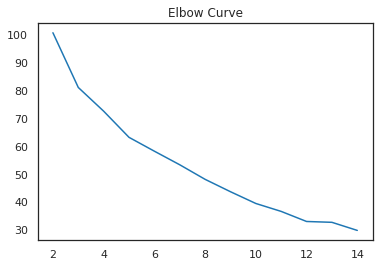

In [51]:
from sklearn.cluster import KMeans
X =  df_minmax_scaled.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

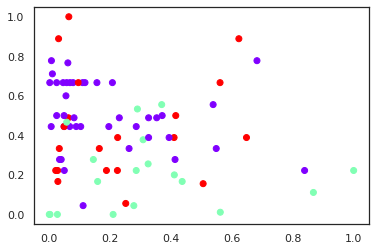

In [52]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [53]:
cluster_labels_scaled = pd.DataFrame(kmeans.labels_, index = df_minmax_scaled.index, columns=['Cluster'])
cluster_labels_scaled

,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),0
Amundi MSCI Nordic UCITS ETF EUR (C),2
Amundi MSCI Switzerland UCITS ETF EUR (C),2
Amundi Prime Euro Corporates UCITS ETF DR (C),1
Amundi Prime Euro Govies UCITS ETF DR (C),1
...,...
Xtrackers MSCI Thailand UCITS ETF 1C,0
Xtrackers Nikkei 225 UCITS ETF 1D,0
Xtrackers S&P Select Frontier Swap UCITS ETF 1C,2
Xtrackers Spanish Equity UCITS ETF 1C,0


In [54]:
df_scaled = pd.concat([df_minmax_scaled, cluster_labels_scaled],axis=1)
df_scaled.head()

,Fund Size in m,TER in p,1W in p,1M in p,3M in p,6M in p,1Y in p,3Y in p,5Y in p,YTD in p,...,Average perf,Average vola,Average risk,Distributing,Rep_Full,Rep_Opti,Rep_Samp,Rep_Swap,Cluster,Cluster
Amundi CAC 40 UCITS ETF DR EUR (C),0.838811,0.222222,0.577722,0.508637,0.777011,0.851316,0.751396,0.467657,0.592064,0.529551,...,0.530568,0.472938,0.962385,0.0,1.0,0.0,0.0,0.0,1.0,0
Amundi MSCI Nordic UCITS ETF EUR (C),0.223787,0.222222,0.497168,0.305402,0.466153,0.632108,0.616694,0.492195,0.619310,0.235461,...,0.558406,0.417784,0.978899,0.0,0.0,0.0,0.0,1.0,0.5,2
Amundi MSCI Switzerland UCITS ETF EUR (C),0.187793,0.222222,0.614852,0.400588,0.766923,0.804300,0.664866,0.476852,0.612228,0.368322,...,0.541000,0.352062,0.993578,0.0,0.0,0.0,0.0,1.0,0.5,2
Amundi Prime Euro Corporates UCITS ETF DR (C),0.026604,0.000000,0.661422,0.504226,0.630210,0.654209,0.469476,0.351683,0.434029,0.565485,...,0.398992,0.490911,0.906218,0.0,0.0,0.0,1.0,0.0,0.0,1
Amundi Prime Euro Govies UCITS ETF DR (C),0.209703,0.000000,0.655129,0.493201,0.627821,0.641752,0.455790,0.351683,0.434029,0.563121,...,0.398992,0.490911,0.906218,0.0,0.0,0.0,1.0,0.0,0.5,1
